In [40]:
from kalman_filter import *
import numpy as np
import torch
torch.set_default_tensor_type(torch.DoubleTensor)
rng = np.random.default_rng()

from utils import *
from trajectories import *

CUT = 5 # cutoff the first few datapoints because they have too much noise so it is not a fair comparison.
T = 250 # how long to simulate the trajectory # 100
num_traj = 2

## Generate Trajectories

In [89]:
task_name = 'circular' # Choose from 'circular', 'motion', 'so3', or 'accel'
A, B, C, Q, R, x0, state_dim, input_dim, obs_dim = sys_params[task_name]
u_seq = 0.05 * (rng.random(size=(num_traj, T, input_dim))*2 - 1)
traj, meas = generate_traj(num_traj, T, A, B, C, Q, R, x0, u_seq, state_dim, input_dim, obs_dim)
# traj  has shape=(num_traj, T, state_dim)
# meas  has shape=(num_traj, T, obs_dim)
# u_seq has shape=(num_traj, T, input_dim)
print("A", A)
print("B", B)
print("C", C)

A [[ 0.9998477  -0.01745241]
 [ 0.01745241  0.9998477 ]]
B [[0.5]
 [0.7]]
C [[1. 0.]
 [0. 1.]]


Trajectory shape (250, 2)
Measured shape (250, 2)


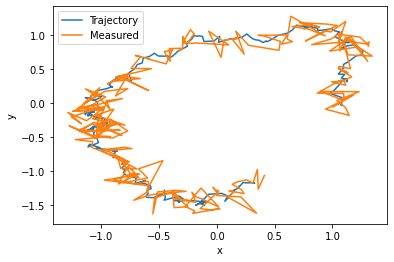

In [90]:
# plot a sample trajectory and noisy measurements
plot({'Trajectory': traj[0], 'Measured': meas[0]})

Trajectory shape (250, 2)
Measured shape (250, 2)


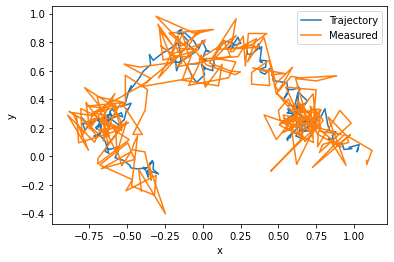

In [91]:
plot({"Trajectory":traj[1], 'Measured': meas[1]})

u_seq[0] (250, 1)
meas[0] (250, 2)
A_found [[ 0.99935673 -0.01963734]
 [ 0.01858374  0.99824416]]
B_found [[-0.1770384]
 [ 0.1184535]]
C_found [[-2.11857167  1.97272642]
 [-2.5994885  -1.6881606 ]]
X [[-2.43108582e-01  2.89645340e-01]
 [-2.45212595e-01  2.58193317e-01]
 [-2.71280631e-01  2.59234813e-01]
 [-2.94602183e-01  2.46632418e-01]
 [-3.05257773e-01  2.44395578e-01]
 [-2.83061869e-01  2.33296447e-01]
 [-2.98322750e-01  2.31539920e-01]
 [-2.96471226e-01  2.24460950e-01]
 [-3.05109660e-01  2.17592521e-01]
 [-3.18925674e-01  2.20347355e-01]
 [-3.26008394e-01  1.99105331e-01]
 [-3.34778269e-01  1.97891941e-01]
 [-3.47218842e-01  1.94440691e-01]
 [-3.78171904e-01  1.51632887e-01]
 [-3.92362069e-01  1.74519806e-01]
 [-4.01572510e-01  1.73070106e-01]
 [-4.17558435e-01  1.44460847e-01]
 [-4.27722509e-01  1.35786611e-01]
 [-4.13752687e-01  1.45381161e-01]
 [-4.23029520e-01  1.23410271e-01]
 [-4.10055773e-01  1.31113931e-01]
 [-4.10962850e-01  1.12699163e-01]
 [-4.17797764e-01  9.88996806e

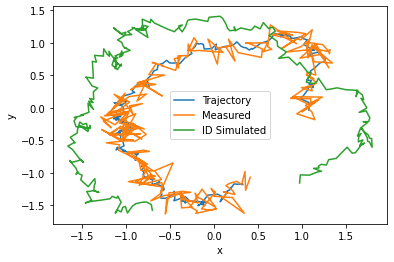

In [96]:
print("u_seq[0]", u_seq[0].shape)
print("meas[0]", meas[0].shape)
A_found, B_found, C_found, X_found = sys_id(meas[0], u_seq[0], model_order=2, window=10)

print("A_found", A_found)
print("B_found", B_found)
print("C_found", C_found)
print("X", X_found.T)

plot({'Trajectory': traj[0], 'Measured': meas[0], 'ID Simulated':-4*X_found.T})

A_found [[ 0.99935673 -0.01963734]
 [ 0.01858374  0.99824416]]
B_found [[-0.1770384]
 [ 0.1184535]]
C_found [[-2.11857167  1.97272642]
 [-2.5994885  -1.6881606 ]]
Y_val_pred (2, 250)
X_val_pred (2, 251)
meas (2, 250, 2)
Trajectory shape (250, 2)
Real output shape (250, 2)
Prediction shape (250, 2)


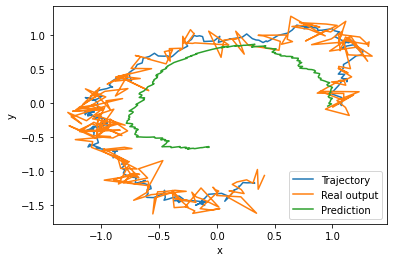

In [93]:
x0est = estimateInitial(A_found, B_found, C_found, u_seq[1].T, meas[1].T, h=10)
print("A_found", A_found)
print("B_found", B_found)
print("C_found", C_found)

# simulate the open loop model 
Y_val_prediction, X_val_prediction = systemSimulate(A_found, B_found, C_found, u_seq[1].T, x0est)

print("Y_val_pred", Y_val_prediction.shape)
print("X_val_pred", X_val_prediction.shape)
print("meas", meas.shape)
# compute the errors

# plot the prediction and the real output 

plot({"Trajectory": traj[0], "Real output": meas[0], "Prediction":Y_val_prediction.T})
# plt.figure()
# plt.plot(meas[1,:100, 0], 'k', label='Real output')
# plt.plot(Y_val_prediction[1,:100],'r',label='Prediction')
# plt.legend()
# plt.xlabel('Time steps')
# plt.ylabel('Predicted and real outputs')
# plt.show()


### Generalized System Identification: Update on the identified system at each timestep

Converged in 7 iterations
(250, 2)
[[ 3.36046412e-01  1.48289100e-01]
 [-3.35186854e-02  2.41612129e-01]
 [-1.04381873e-01  2.67329700e-01]
 [-1.35712901e-01  3.17880551e-01]
 [-1.60380638e-01  3.20617118e-01]
 [-1.76662096e-01  2.99667495e-01]
 [-2.20901487e-01  3.02687508e-01]
 [-1.98345460e-01  2.47595920e-01]
 [-1.93720494e-01  2.72696902e-01]
 [-2.08390398e-01  2.73569691e-01]
 [-1.88651301e-01  2.36902702e-01]
 [-2.32028521e-01  2.30112218e-01]
 [-2.49865976e-01  2.32198421e-01]
 [-2.47161285e-01  2.44274658e-01]
 [-2.37410416e-01  2.19441074e-01]
 [-2.48770016e-01  2.26929742e-01]
 [-2.67821262e-01  2.29866682e-01]
 [-2.79999117e-01  1.97423923e-01]
 [-2.84414312e-01  2.07207454e-01]
 [-2.87041321e-01  1.91539589e-01]
 [-2.90892493e-01  1.77965624e-01]
 [-2.99764555e-01  1.94997694e-01]
 [-3.51092914e-01  1.43598816e-01]
 [-3.47285564e-01  1.51005488e-01]
 [-3.65939043e-01  1.89047538e-01]
 [-3.82195213e-01  1.35519837e-01]
 [-3.93599692e-01  1.11752689e-01]
 [-3.64484539e-01  1

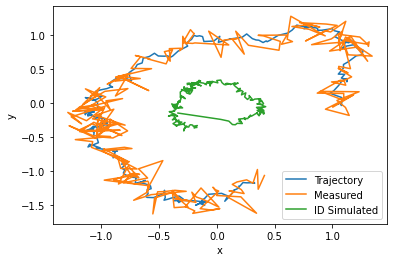

In [94]:
id_filtered_gen = np.zeros(shape=(num_traj, T, state_dim))

i = 0
A_found, B_found, C_found, X_seq = sys_id(meas[i], u_seq[i], model_order=state_dim, window=3)
kinematics = KFilter(A_found, B_found, C_found, Q, R, state=x0)
x_poses_recovered = kinematics.simulate(meas[i], u_seq[i])

print(x_poses_recovered.shape)
print(x_poses_recovered)

plot({'Trajectory': traj[0], 'Measured': meas[0], 'ID Simulated':-x_poses_recovered})

# for i in range(num_traj):
#     # Use the same data as before, but now no peeking on what are the actual A, B matrices
#     A_unk, B_unk, C_unk = np.zeros(shape=(state_dim, state_dim)), np.zeros(shape=(state_dim, input_dim)), np.zeros(shape=(obs_dim, state_dim))
#     kinematics = KFilter(A_unk, B_unk, C_unk, Q, R, state=x0)
#     id_fltr = np.zeros(shape=(T,state_dim))
    
#     for t in range(20, T):
#         A_found, B_found, C_found, X_seq = sys_id(meas[i], u_seq[i], model_order=state_dim, window=3)
#         print("A found", A_found)
#         print("B found", B_found)
#         print("C found", C_found)
#         kinematics.A = A_found
#         kinematics.B = B_found
#         kinematics.C = C_found
#         kinematics.predict(u_seq[i][t])
#         kinematics.update(meas[i][t])
#         id_fltr[t] = kinematics.state
#     id_filtered_gen[i] = id_fltr
    
# err_id_fltr = np.linalg.norm(id_filtered_gen[:, CUT:, :] - traj[:, CUT:, :])**2 / num_traj / T
# print("Average Squared Error", err_id_fltr)

In [ ]:
plot({'Trajectory': traj[0], 'Measured': meas[0], 'Id Filtered': id_filtered_gen[0]})